In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as st

In [68]:
df = pd.read_csv("ipl2017.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [69]:
# checking the dimensions of the data
df.shape

(76014, 15)

In [70]:
# checking for null values, data types to preprocess data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


### From the above info there are no null values in the dataset

# Univariate analysis

In [71]:
cat_columns = [i for i in df.columns if df[i].dtype=='O']

In [72]:
cat_columns

['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

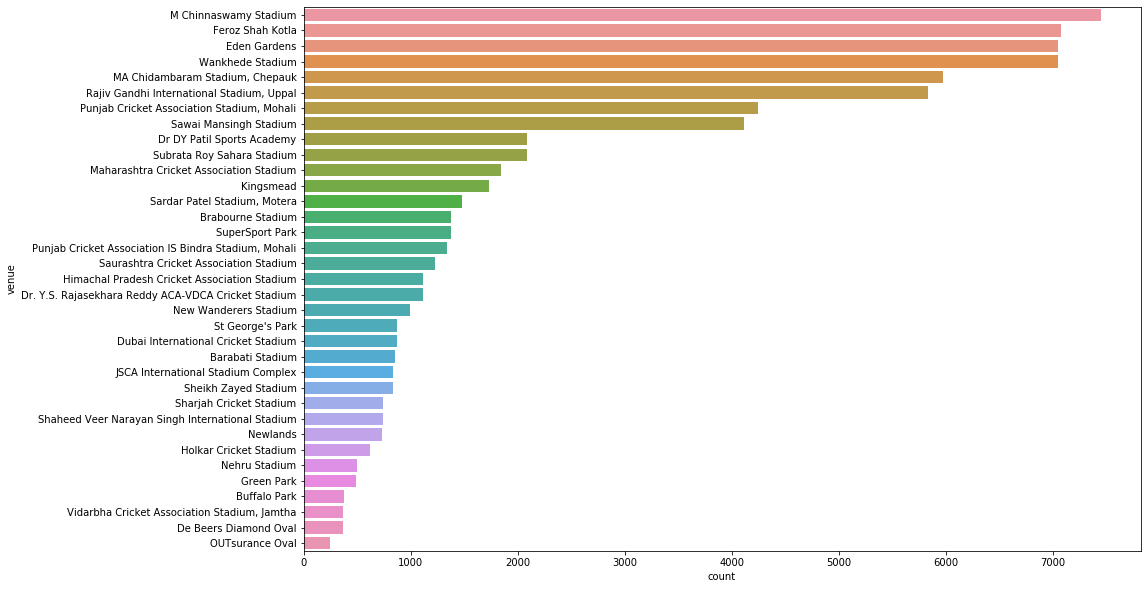

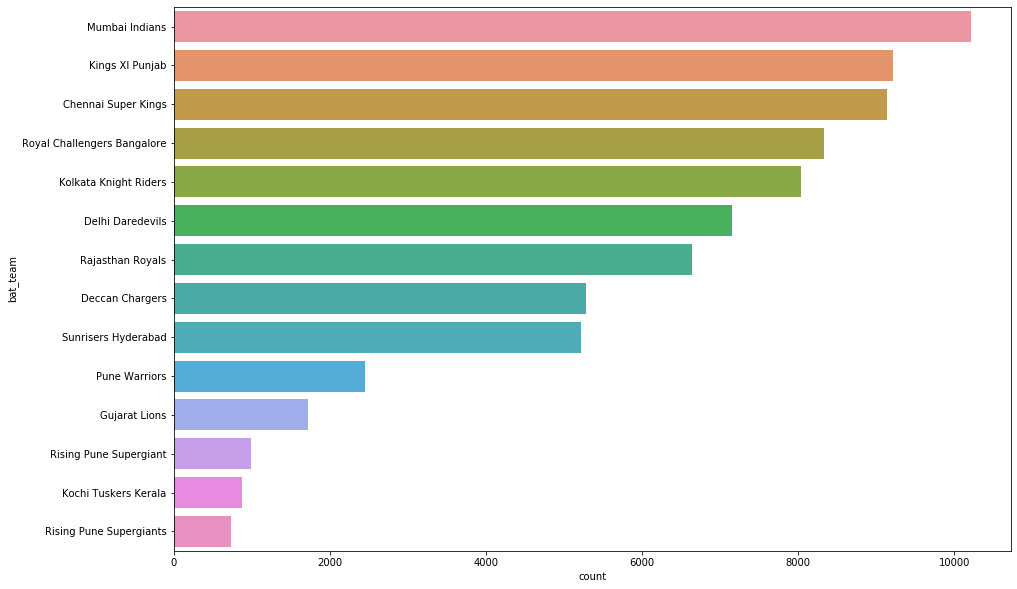

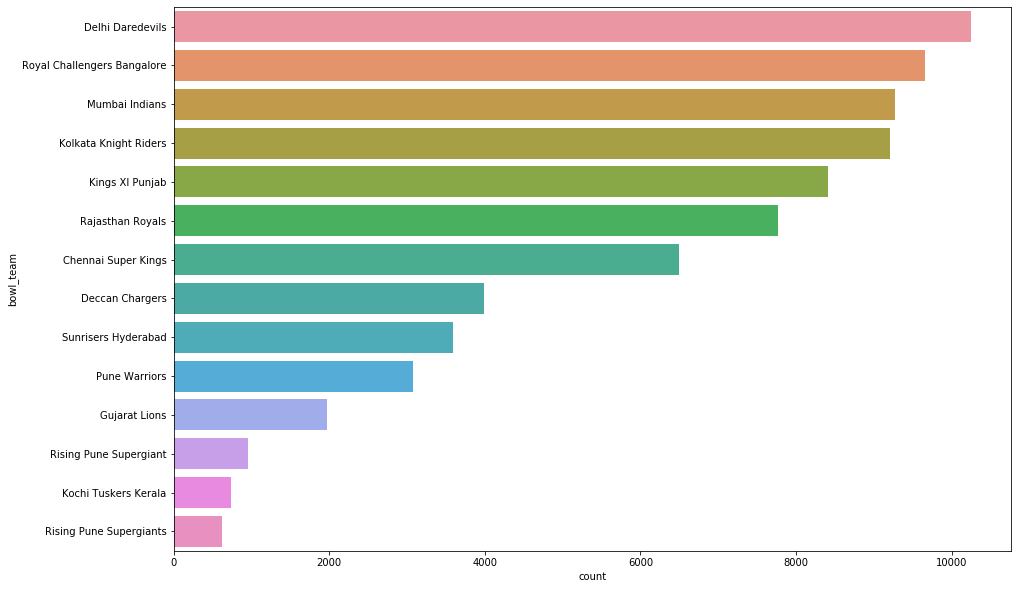

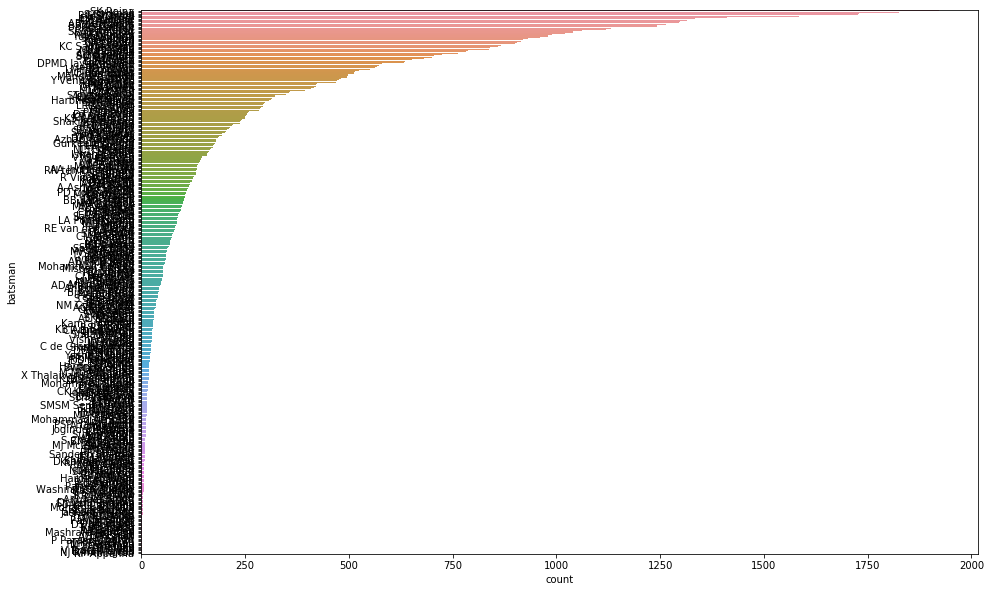

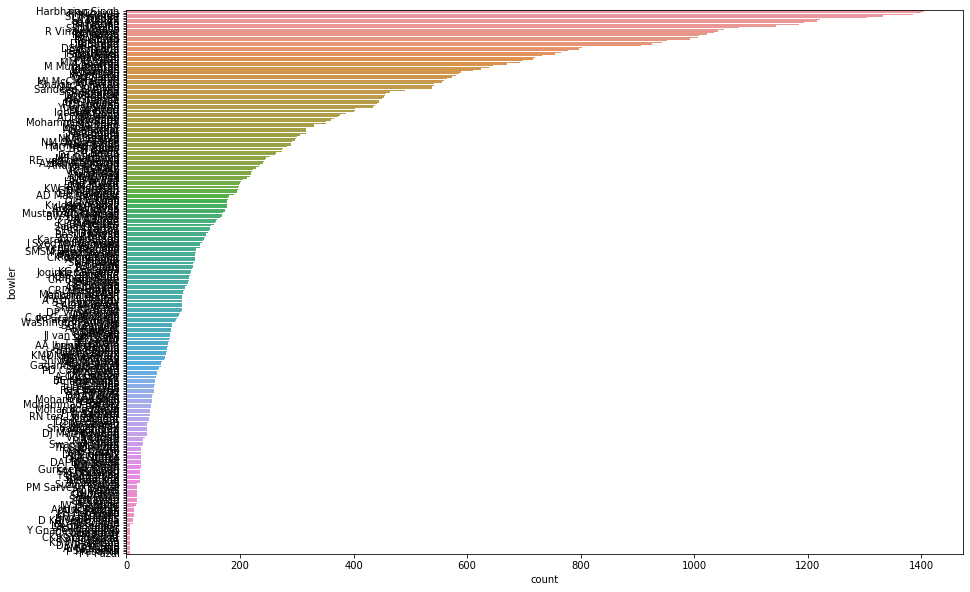

In [73]:
for column in cat_columns[1:]:
    plt.figure(figsize=(15,10))
    sns.countplot(y=column,data=df,order=df[column].value_counts().index,)
    plt.show()

### From the barplots of venue, bat_team and bowl_team
1. Only twice ipl is conducted out side of India (i.e in 2009 in South Africa and 2014 in UAE)
2. so from the plots we can see less count for outside India stadiums like OUTsurance Oval, Newlands etc


### The plots for batsman and bowler are not good

#### batsman

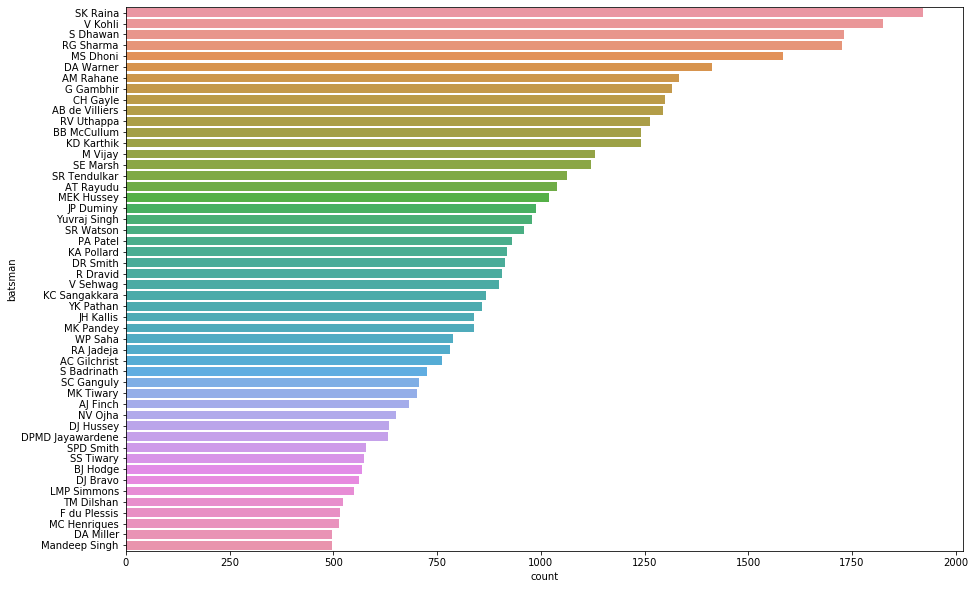

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(y="batsman",data=df,order=df["batsman"].value_counts().index[:50])
plt.show()

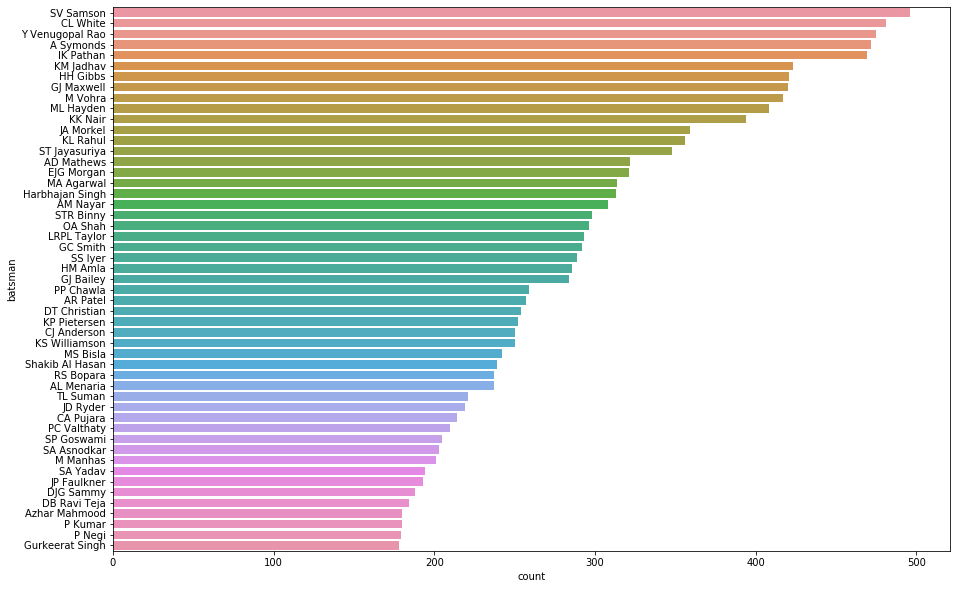

In [75]:
plt.figure(figsize=(15,10))
sns.countplot(y="batsman",data=df,order=df["batsman"].value_counts().index[50:101])
plt.show()

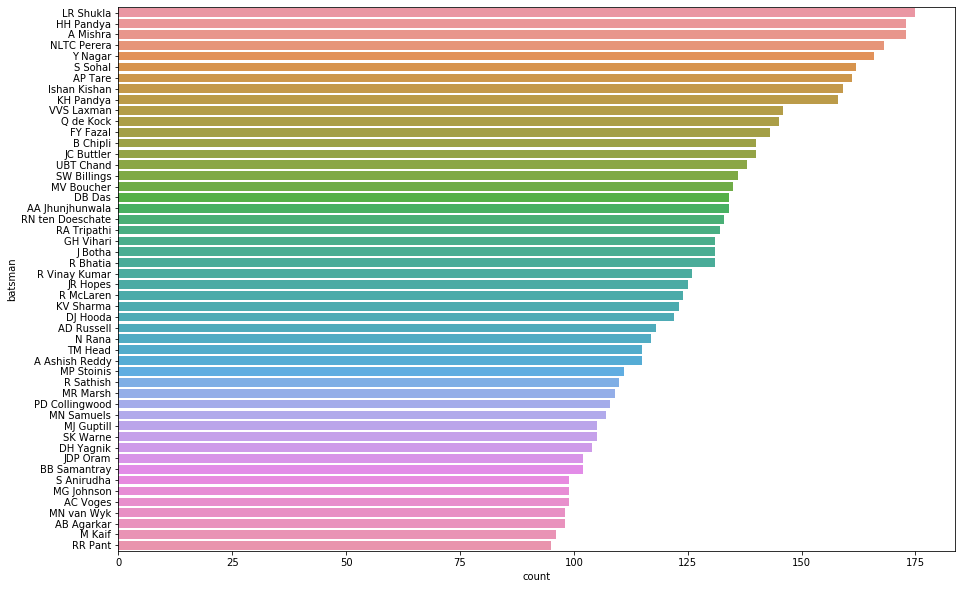

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(y="batsman",data=df,order=df["batsman"].value_counts().index[101:151])
plt.show()

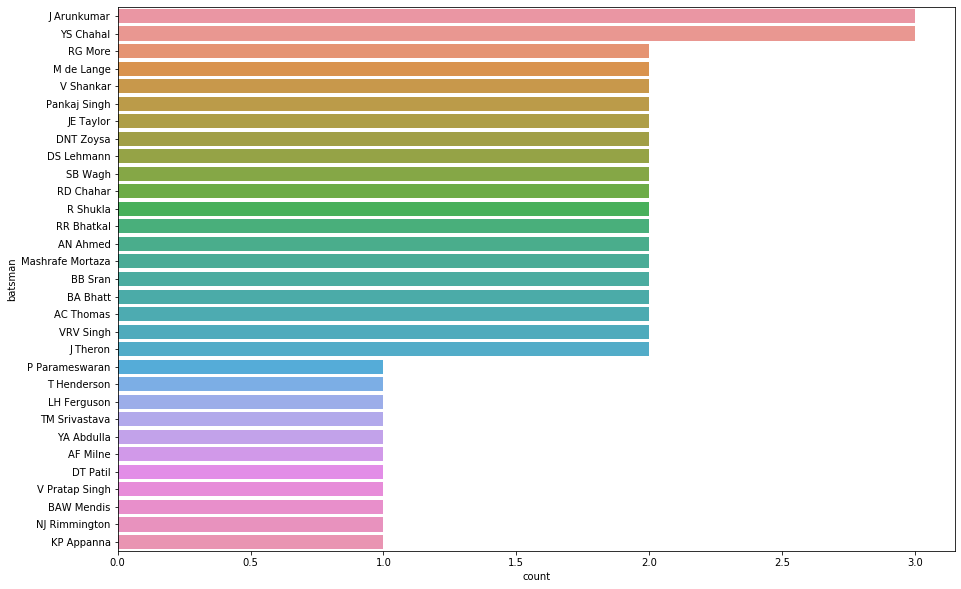

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(y="batsman",data=df,order=df["batsman"].value_counts().index[380:411])
plt.show()

In [78]:
df["batsman"].value_counts()

SK Raina          1921
V Kohli           1825
S Dhawan          1730
RG Sharma         1726
MS Dhoni          1584
                  ... 
DT Patil             1
V Pratap Singh       1
BAW Mendis           1
NJ Rimmington        1
KP Appanna           1
Name: batsman, Length: 411, dtype: int64

### from the above graph and value counts for batsman 
1. There are total of 411 batsman played ipl till 2017
2. we know since it's an ipl Indian players should have faced more balls than foreign players 
3. The bowlers and debut players obviously face very less no of balls

#### bowler

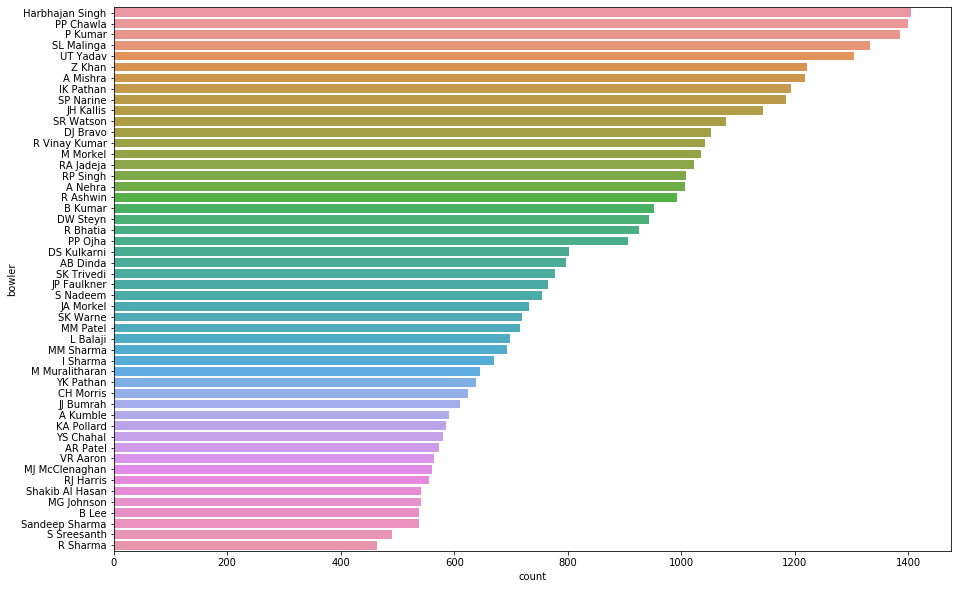

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(y="bowler",data=df,order=df["bowler"].value_counts().index[:50])
plt.show()

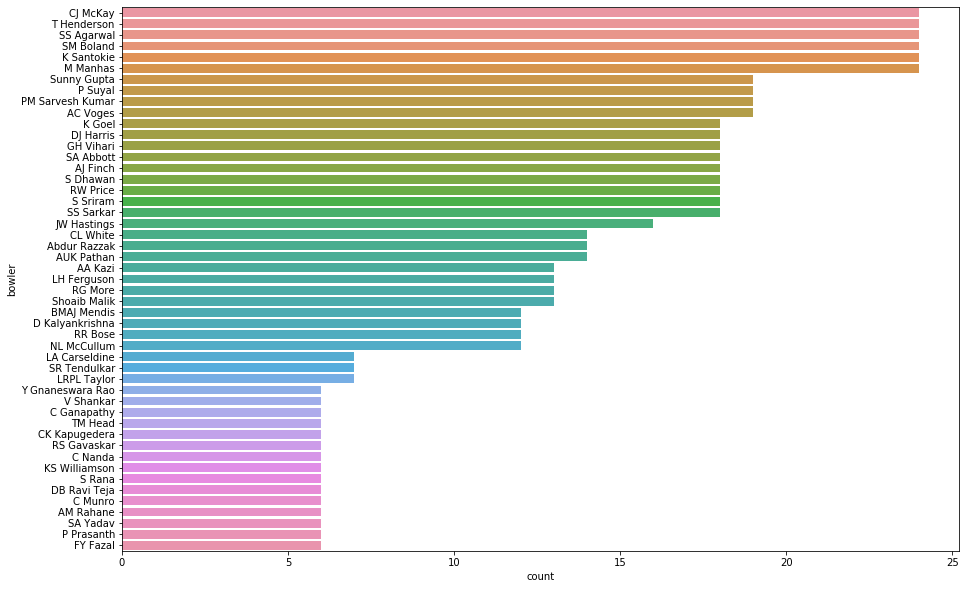

In [80]:
plt.figure(figsize=(15,10))
sns.countplot(y="bowler",data=df,order=df["bowler"].value_counts().index[280:330])
plt.show()

In [81]:
df['bowler'].value_counts()

Harbhajan Singh    1404
PP Chawla          1399
P Kumar            1386
SL Malinga         1333
UT Yadav           1304
                   ... 
C Munro               6
AM Rahane             6
SA Yadav              6
P Prasanth            6
FY Fazal              6
Name: bowler, Length: 329, dtype: int64

### From the above plots and no of balls bowled by players
1. Again Indian bowlers bowled more balls
2. Malinga being experienced bowler he was in the top five bowlers
3. The less no of bowled players are actually batsaman or debut players

In [82]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [83]:
#lets preprocess date column
df['date'] = pd.to_datetime(df['date'])

In [84]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

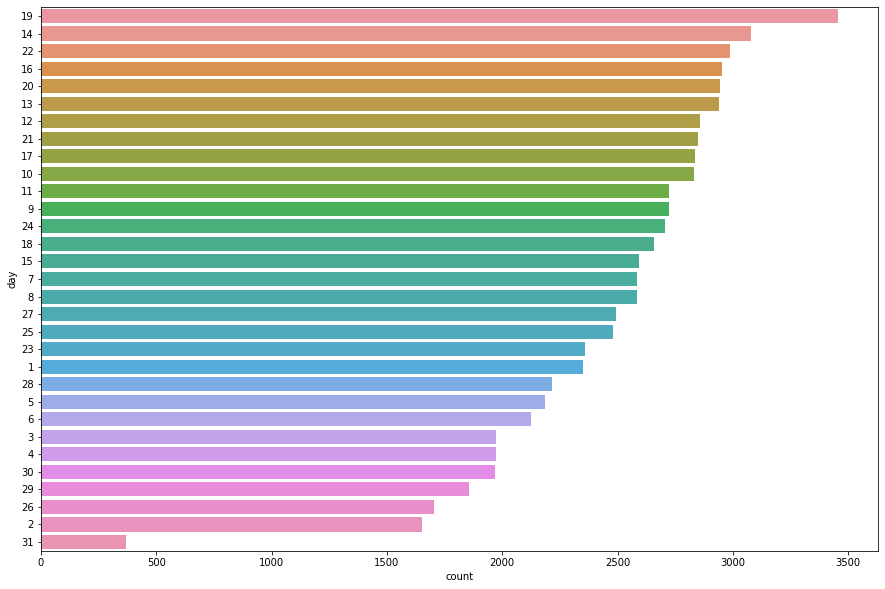

In [85]:
plt.figure(figsize=(15,10))
sns.countplot(y="day",data=df,order=df["day"].value_counts().index)
plt.show()

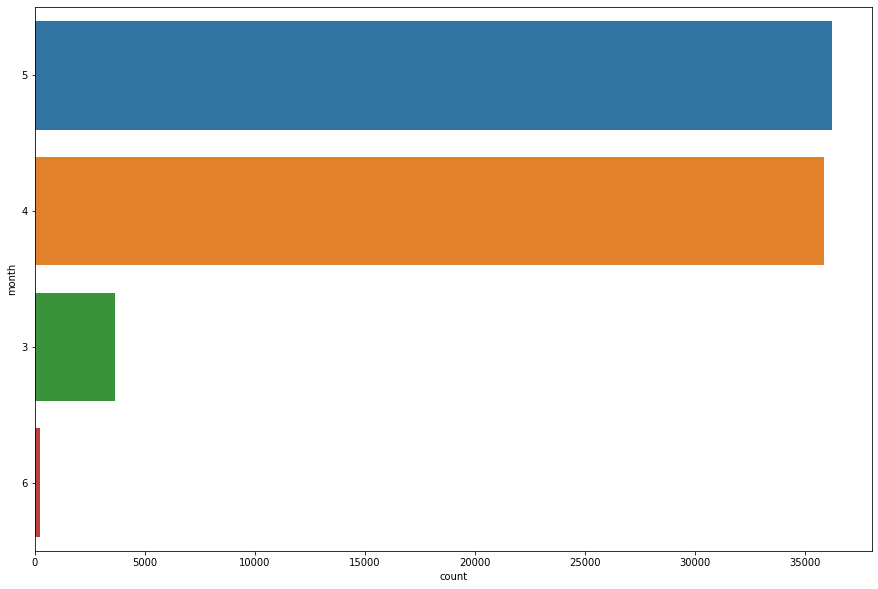

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(y="month",data=df,order=df["month"].value_counts().index)
plt.show()

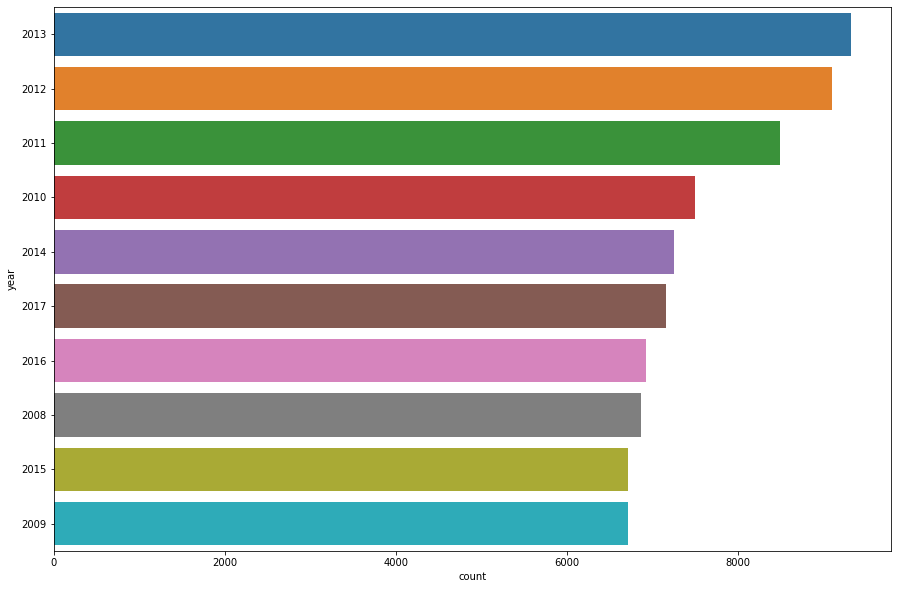

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(y="year",data=df,order=df["year"].value_counts().index)
plt.show()

In [88]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,day,month,year
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,18,4,2008
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,18,4,2008
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,18,4,2008
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,18,4,2008
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,18,4,2008


In [89]:
#since we have extracted day,month and year from date drop the date column
#matchid also unecessary column to predict the score 
df.drop(['date','mid'],axis=1,inplace=True)

In [90]:
venue = pd.get_dummies(df['venue'],drop_first=True)
venue

,Brabourne Stadium,Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,Eden Gardens,Feroz Shah Kotla,Green Park,Himachal Pradesh Cricket Association Stadium,...,Saurashtra Cricket Association Stadium,Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,"Vidarbha Cricket Association Stadium, Jamtha",Wankhede Stadium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
batteam = pd.get_dummies(df['bat_team'],drop_first=True)
batteam

,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0,0,0,0,0,0,1,0,0,0,0,0,0
76010,0,0,0,0,0,0,1,0,0,0,0,0,0
76011,0,0,0,0,0,0,1,0,0,0,0,0,0
76012,0,0,0,0,0,0,1,0,0,0,0,0,0


In [92]:
bowlteam = pd.get_dummies(df['bowl_team'],drop_first=True)
bowlteam

,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0,0,0,0,0,0,0,0,0,1,0,0,0
76010,0,0,0,0,0,0,0,0,0,1,0,0,0
76011,0,0,0,0,0,0,0,0,0,1,0,0,0
76012,0,0,0,0,0,0,0,0,0,1,0,0,0


In [93]:
batsman = pd.get_dummies(df['batsman'],drop_first=True)
batsman

,A Chandila,A Chopra,A Choudhary,A Flintoff,A Kumble,A Mishra,A Mithun,A Mukund,A Nehra,A Singh,...,X Thalaivan Sargunam,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,YV Takawale,Yashpal Singh,Yuvraj Singh,Z Khan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
bowler = pd.get_dummies(df['bowler'],drop_first=True)
bowler

,A Chandila,A Choudhary,A Flintoff,A Kumble,A Mishra,A Mithun,A Nehra,A Singh,A Symonds,A Uniyal,...,WPUJC Vaas,Washington Sundar,Y Gnaneswara Rao,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,day,month,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,18,4,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,18,4,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,18,4,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,18,4,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,18,4,2008


In [96]:
data = pd.concat([df,venue,batteam,bowlteam,batsman,bowler],axis=1)

In [97]:
data.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,WPUJC Vaas,Washington Sundar,Y Gnaneswara Rao,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,...,0,0,0,0,0,0,0,0,0,0
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data.drop(['venue','bat_team','bowl_team','batsman','bowler'],axis=1,inplace=True)

In [102]:
data.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,day,month,...,WPUJC Vaas,Washington Sundar,Y Gnaneswara Rao,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
0,1,0,0.1,1,0,0,0,222,18,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.2,1,0,0,0,222,18,4,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.2,2,0,0,0,222,18,4,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0.3,2,0,0,0,222,18,4,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0.4,2,0,0,0,222,18,4,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X = data.drop(['total'],axis=1)
Y = data['total']

In [105]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [107]:
std = StandardScaler()
scaled_data = std.fit_transform(X)
X = pd.DataFrame(scaled_data,columns=X.columns)

In [108]:
X.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,day,month,year,...,WPUJC Vaas,Washington Sundar,Y Gnaneswara Rao,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
0,-1.513413,-1.198815,-1.677434,-2.160136,-1.06358,-1.243165,-0.82156,0.285026,-0.737858,-1.621616,...,-0.028801,-0.033655,-0.008885,-0.022945,-0.04139,-0.035374,-0.092001,-0.087762,-0.075865,-0.127823
1,-1.513413,-1.198815,-1.660110,-2.160136,-1.06358,-1.243165,-0.82156,0.285026,-0.737858,-1.621616,...,-0.028801,-0.033655,-0.008885,-0.022945,-0.04139,-0.035374,-0.092001,-0.087762,-0.075865,-0.127823
2,-1.492930,-1.198815,-1.660110,-2.093085,-1.06358,-1.243165,-0.82156,0.285026,-0.737858,-1.621616,...,-0.028801,-0.033655,-0.008885,-0.022945,-0.04139,-0.035374,-0.092001,-0.087762,-0.075865,-0.127823
3,-1.492930,-1.198815,-1.642787,-2.093085,-1.06358,-1.243165,-0.82156,0.285026,-0.737858,-1.621616,...,-0.028801,-0.033655,-0.008885,-0.022945,-0.04139,-0.035374,-0.092001,-0.087762,-0.075865,-0.127823
4,-1.492930,-1.198815,-1.625464,-2.093085,-1.06358,-1.243165,-0.82156,0.285026,-0.737858,-1.621616,...,-0.028801,-0.033655,-0.008885,-0.022945,-0.04139,-0.035374,-0.092001,-0.087762,-0.075865,-0.127823


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = lin_reg.predict(X_test)


In [112]:
from sklearn.metrics import mean_squared_error,r2_score

In [113]:
mean_squared_error(y_test,y_pred)

9.615451575060548e+26

In [114]:
r2_score(y_test,y_pred)

-1.1324561717296087e+24

In [115]:
rforest = RandomForestRegressor()
rforest.fit(X_train,y_train)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
y_predict = rforest.predict(X_test)

In [117]:
mean_squared_error(y_test,y_predict)

33.00339443104583

In [118]:
r2_score(y_test,y_predict)

0.961130377060602

In [119]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,day,month,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,18,4,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,18,4,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,18,4,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,18,4,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,18,4,2008


In [122]:
data1 = df.iloc[0,:].copy()

In [128]:
data1.index

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'day', 'month', 'year'],
      dtype='object')